In [14]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [79]:
# Where to save the figures and data files
PROJECT_ROOT_DIR = "/Users/endriasa//Projects/FYS4150/src/Project2/Results"
FIGURE_ID = "Results/Figures"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", dpi=100,pad_inches=0.0,transparent=False, bbox_inches='tight',format='png')

In [80]:
size    = np.arange(10, 260, 10)
n       = np.zeros(np.size(size))
n_rot   = np.zeros(np.size(size))
tim_arm = np.zeros(np.size(size))
tim_jac = np.zeros(np.size(size))

with open(data_path("Time_file.txt"), "r") as results:
        for line_num, line_string in enumerate(results):
            words             = line_string.split()
            n[line_num]       = float(words[2])
            n_rot[line_num]   = float(words[7])
            tim_arm[line_num] = float(words[11])
            tim_jac[line_num] = float(words[15])

[[0.         0.26692568 1.82994407]]
128.17138172955237


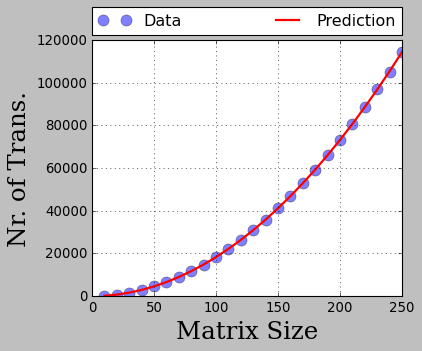

In [110]:
linreg = LinearRegression()
poly   = PolynomialFeatures(degree=2)
X      = poly.fit_transform(n[:,np.newaxis])

lin_model = LinearRegression()
lin_model.fit(X, n_rot.reshape(-1, 1))

ypredict = lin_model.predict(X)
rmse     = (np.sqrt(mean_squared_error(n_rot.reshape(-1, 1), ypredict)))

#clf    = LinearRegression()
#clf.fit(X,n_rot.reshape(-1, 1))
#ypredict = clf.predict(X)
#print(clf.coef_)

print(lin_model.coef_)
print(rmse)

plt.figure(figsize = (5, 4))
plt.style.use('classic')
plt.plot(n, n_rot, 'o', ms=10, alpha=0.5, label = "Data")
plt.plot(n, ypredict, 'r-',linewidth = 2, label = "Prediction")
plt.xlabel("Matrix Size", fontname = "serif", fontsize = 22)
plt.ylabel("Nr. of Trans.", fontname = "serif", fontsize = 22)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
save_fig('N_vs_Rotation')
plt.show()

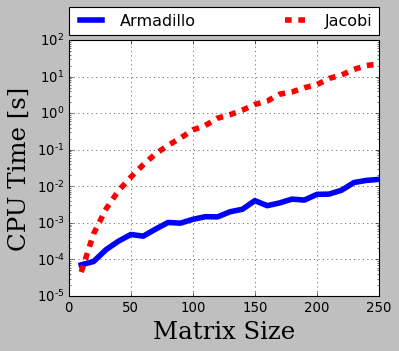

In [115]:
plt.figure(figsize = (5, 4))
plt.style.use('classic')
plt.semilogy(n, (tim_arm), 'b-',linewidth = 5, label = "Armadillo")
plt.semilogy(n, (tim_jac), 'r--',linewidth = 5, label = "Jacobi")
plt.xlabel("Matrix Size", fontname = "serif", fontsize = 22)
plt.ylabel("CPU Time [s]", fontname = "serif", fontsize = 22)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
save_fig('arma_vs_jacobi')
plt.show()

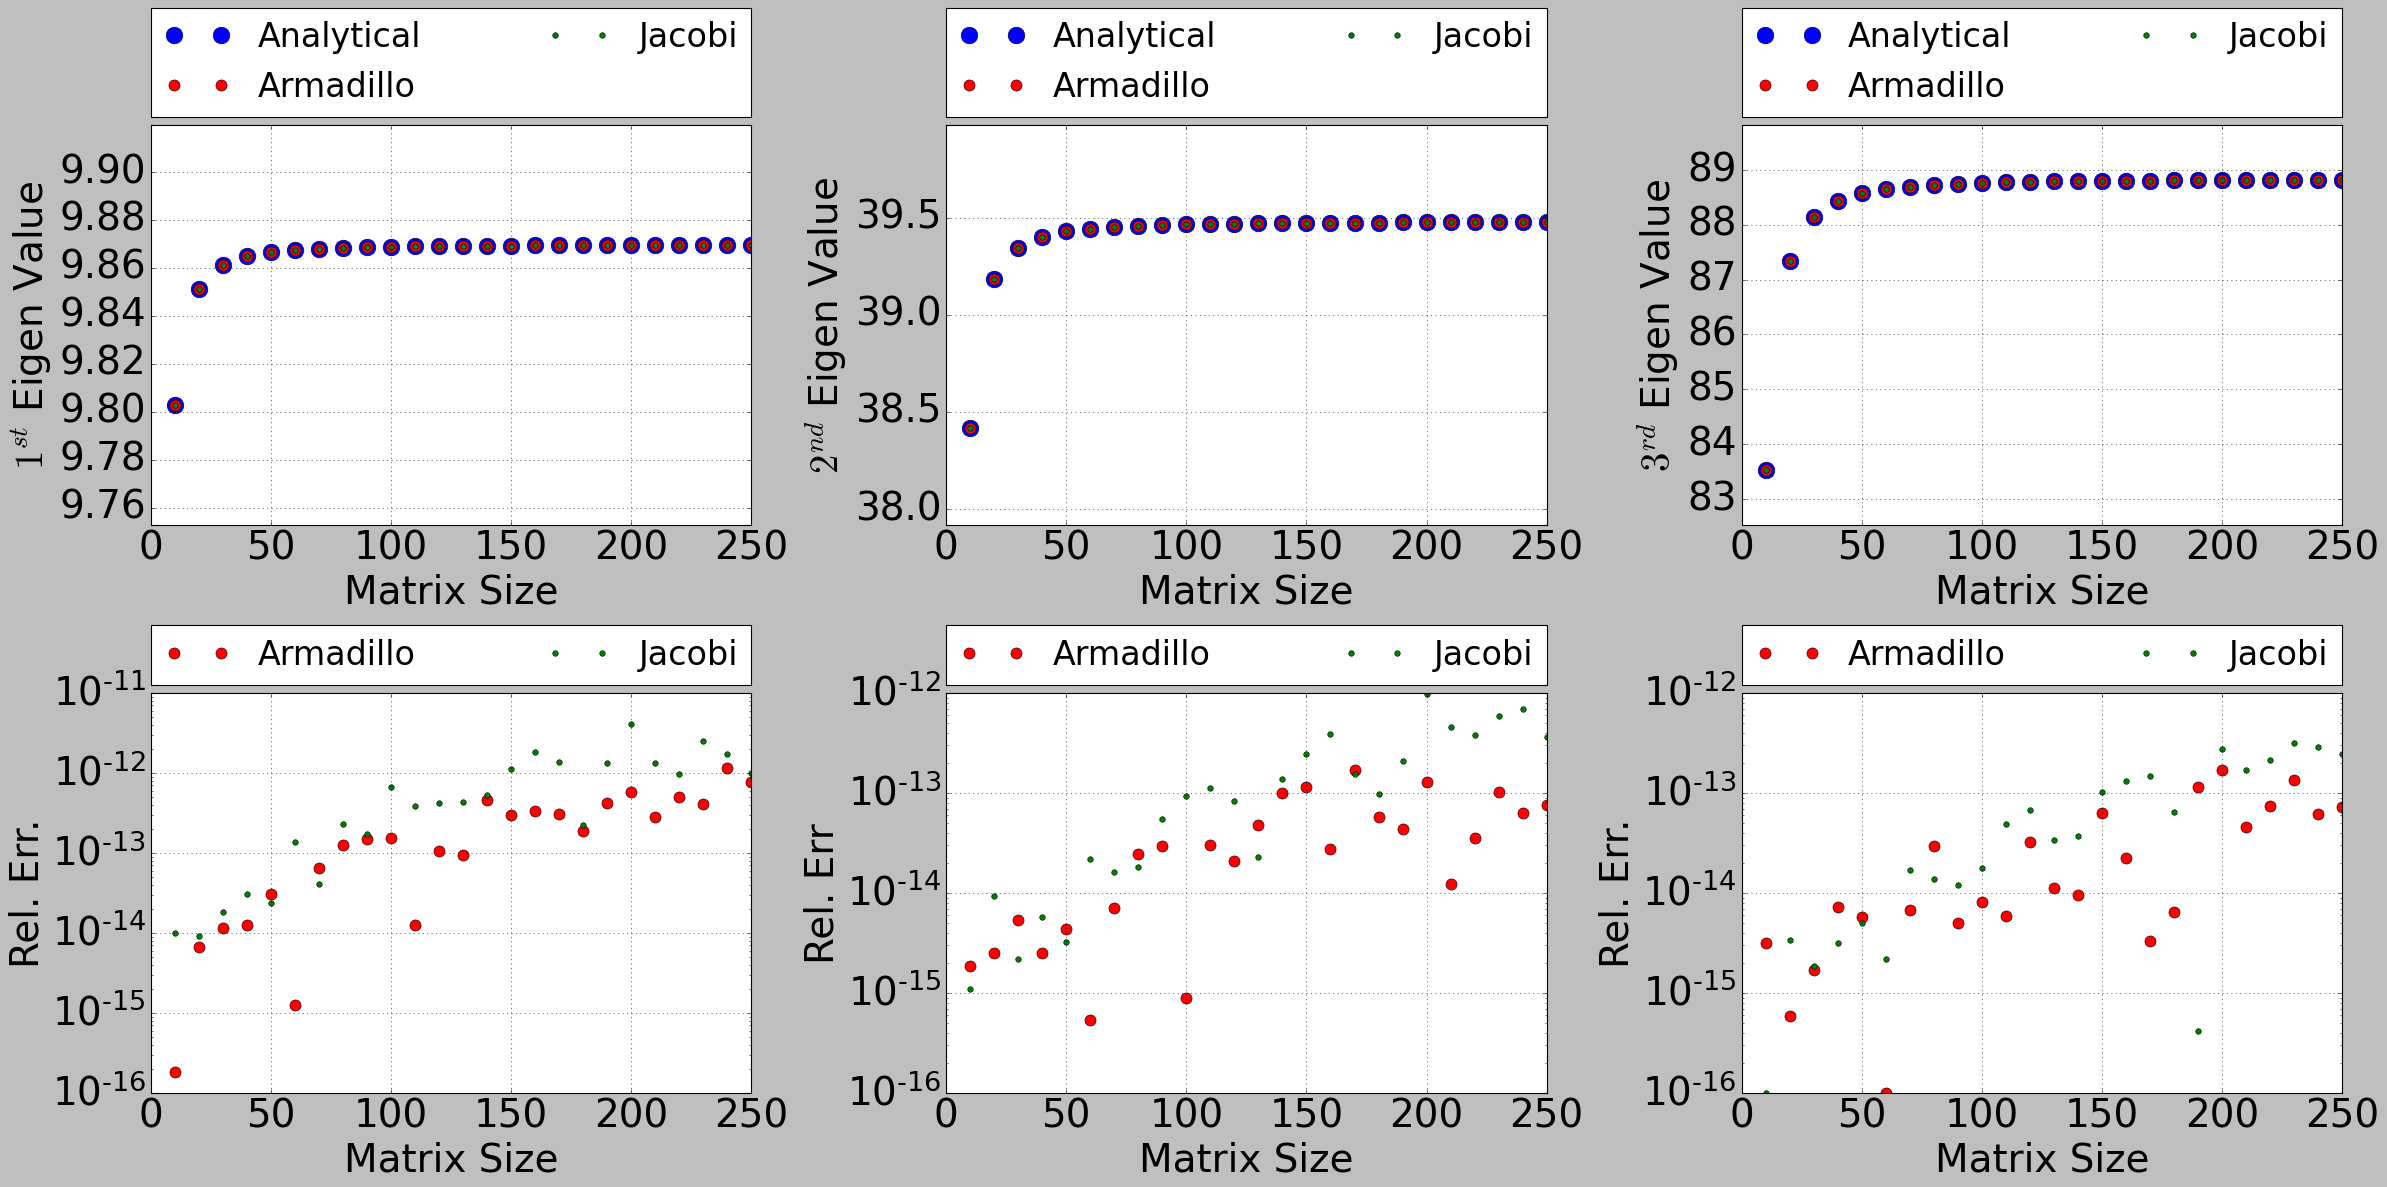

In [117]:
eigval_ana1 = np.zeros(np.size(size))
eigval_arm1 = np.zeros(np.size(size))
eigval_jac1 = np.zeros(np.size(size))
eigval_ana2 = np.zeros(np.size(size))
eigval_arm2 = np.zeros(np.size(size))
eigval_jac2 = np.zeros(np.size(size))
eigval_ana3 = np.zeros(np.size(size))
eigval_arm3 = np.zeros(np.size(size))
eigval_jac3 = np.zeros(np.size(size))
jj = 0

for ii in size:
    
    tmp_ana = np.zeros(ii)
    tmp_arm = np.zeros(ii)
    tmp_jac = np.zeros(ii)

    with open(data_path("Result_eigenval_{}.txt".format(ii)), "r") as results:
        
        for line_num, line_string in enumerate(results):
            
            if (line_num > 0):
                
                words               = line_string.split()
                tmp_ana[line_num-1] = float(words[0])
                tmp_arm[line_num-1] = float(words[1])
                tmp_jac[line_num-1] = float(words[2])
                
    eigval_ana1[jj] = tmp_ana[0]
    eigval_arm1[jj] = tmp_arm[0]
    eigval_jac1[jj] = tmp_jac[0]
    eigval_ana2[jj] = tmp_ana[1]
    eigval_arm2[jj] = tmp_arm[1]
    eigval_jac2[jj] = tmp_jac[1]
    eigval_ana3[jj] = tmp_ana[2]
    eigval_arm3[jj] = tmp_arm[2]
    eigval_jac3[jj] = tmp_jac[2]
    jj += 1

plt.figure(figsize = (30, 15))
plt.style.use('classic')
ax=plt.subplot(2, 3, 1)
plt.plot(n, eigval_ana1, 'bo',Markersize = 15, label = "Analytical")
plt.plot(n, eigval_arm1, 'ro',Markersize = 10, label = "Armadillo")
plt.plot(n, eigval_jac1, 'go',Markersize = 5, label = "Jacobi")
plt.xlabel("Matrix Size", fontsize = 35)
plt.ylabel("$1^{st}$ Eigen Value", fontsize = 35)
plt.ylim(np.min(eigval_ana1)-5e-2,np.max(eigval_ana1)+5e-2)
ax.tick_params(axis='both', which='major', labelsize=35)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.,fontsize = 30)
plt.tight_layout()

ax=plt.subplot(2, 3, 2)
plt.plot(n, eigval_ana2, 'bo',Markersize = 15, label = "Analytical")
plt.plot(n, eigval_arm2, 'ro',Markersize = 10, label = "Armadillo")
plt.plot(n, eigval_jac2, 'go',Markersize = 5, label = "Jacobi")
plt.xlabel("Matrix Size", fontsize = 35)
plt.ylabel("$2^{nd}$ Eigen Value", fontsize = 35)
plt.ylim(np.min(eigval_ana2)-5e-1,np.max(eigval_ana2)+5e-1)
ax.tick_params(axis='both', which='major', labelsize=35)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.,fontsize = 30)
plt.tight_layout()

ax=plt.subplot(2, 3, 3)
plt.plot(n, eigval_ana3, 'bo',Markersize = 15, label = "Analytical")
plt.plot(n, eigval_arm3, 'ro',Markersize = 10, label = "Armadillo")
plt.plot(n, eigval_jac3, 'go',Markersize = 5, label = "Jacobi")
plt.xlabel("Matrix Size", fontsize = 35)
plt.ylabel("$3^{rd}$ Eigen Value", fontsize = 35)
plt.ylim(np.min(eigval_ana3)-1,np.max(eigval_ana3)+1)
ax.tick_params(axis='both', which='major', labelsize=35)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.,fontsize = 30)
plt.tight_layout()


ax=plt.subplot(2, 3, 4)
plt.semilogy(n, (np.abs(eigval_ana1 - eigval_arm1)/eigval_ana1), 'ro',Markersize = 10, label = "Armadillo")
plt.semilogy(n, (np.abs(eigval_ana1 - eigval_jac1)/eigval_ana1), 'go',Markersize = 5, label = "Jacobi")
plt.xlabel("Matrix Size", fontsize = 35)
plt.ylabel("Rel. Err.", fontsize = 35)
#plt.ylim(np.min(eigval_ana1)-5e-2,np.max(eigval_ana1)+5e-2)
ax.tick_params(axis='both', which='major', labelsize=35)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.,fontsize = 30)
plt.tight_layout()

ax=plt.subplot(2, 3, 5)
plt.semilogy(n, (np.abs(eigval_ana2 - eigval_arm2)/eigval_ana2), 'ro',Markersize = 10, label = "Armadillo")
plt.semilogy(n, (np.abs(eigval_ana2 - eigval_jac2)/eigval_ana2), 'go',Markersize = 5, label = "Jacobi")
plt.xlabel("Matrix Size", fontsize = 35)
plt.ylabel("Rel. Err", fontsize = 35)
#plt.ylim(np.min(eigval_ana2)-5e-1,np.max(eigval_ana2)+5e-1)
ax.tick_params(axis='both', which='major', labelsize=35)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.,fontsize = 30)
plt.tight_layout()

ax=plt.subplot(2, 3, 6)
plt.semilogy(n, (np.abs(eigval_ana3 - eigval_arm3)/eigval_ana3 + 1e-16), 'ro',Markersize = 10, label = "Armadillo")
plt.semilogy(n, (np.abs(eigval_ana3 - eigval_jac3)/eigval_ana3+ 1e-16), 'go',Markersize = 5, label = "Jacobi")
plt.xlabel("Matrix Size", fontsize = 35)
plt.ylabel("Rel. Err.", fontsize = 35)
#plt.ylim(np.min(eigval_ana3)-1,np.max(eigval_ana3)+1)
ax.tick_params(axis='both', which='major', labelsize=35)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.,fontsize = 30)
plt.tight_layout()
save_fig('beam_eigval')
plt.show()

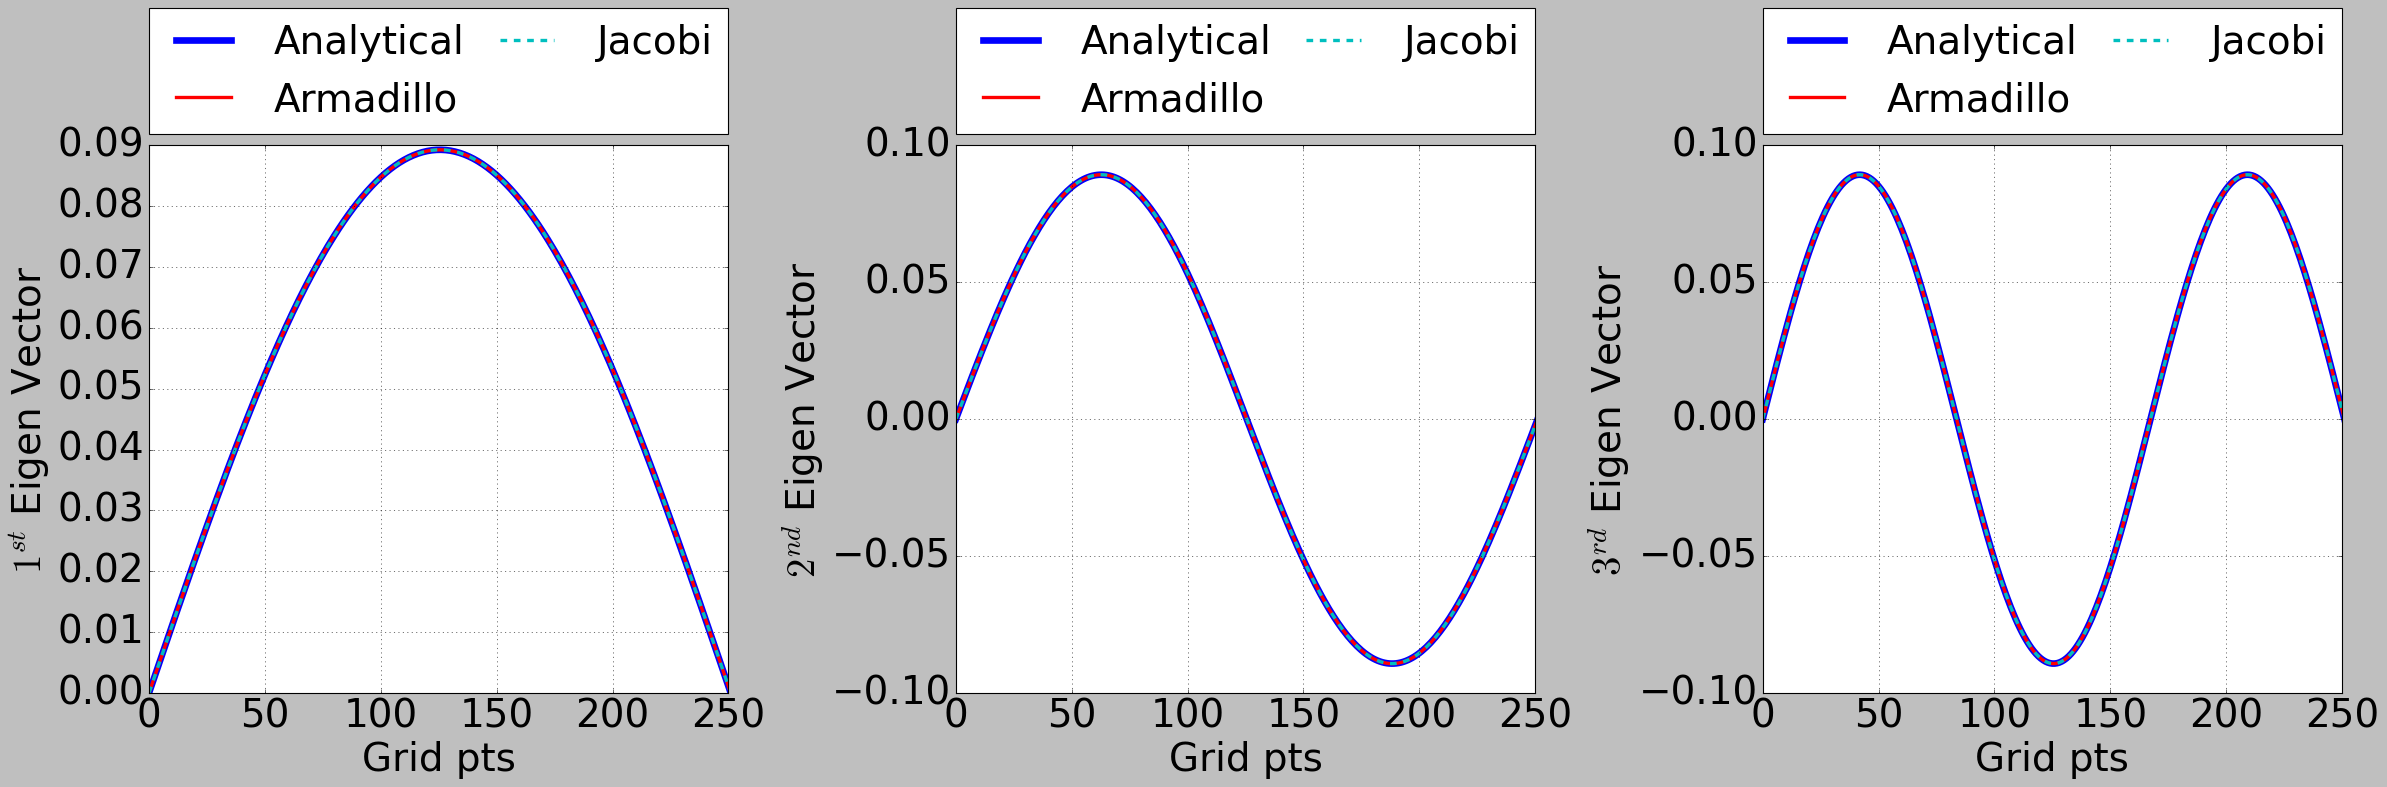

In [108]:
eigvec_ana1_10  = np.zeros(10+2)
eigvec_arm1_10  = np.zeros(10+2)
eigvec_jac1_10  = np.zeros(10+2)
eigvec_ana1_100 = np.zeros(100+2)
eigvec_arm1_100 = np.zeros(100+2)
eigvec_jac1_100 = np.zeros(100+2)
eigvec_ana1_250 = np.zeros(250+2)
eigvec_arm1_250 = np.zeros(250+2)
eigvec_jac1_250 = np.zeros(250+2)

eigvec_ana2_10  = np.zeros(10+2)
eigvec_arm2_10  = np.zeros(10+2)
eigvec_jac2_10  = np.zeros(10+2)
eigvec_ana2_100 = np.zeros(100+2)
eigvec_arm2_100 = np.zeros(100+2)
eigvec_jac2_100 = np.zeros(100+2)
eigvec_ana2_250 = np.zeros(250+2)
eigvec_arm2_250 = np.zeros(250+2)
eigvec_jac2_250 = np.zeros(250+2)

eigvec_ana3_10  = np.zeros(10+2)
eigvec_arm3_10  = np.zeros(10+2)
eigvec_jac3_10  = np.zeros(10+2)
eigvec_ana3_100 = np.zeros(100+2)
eigvec_arm3_100 = np.zeros(100+2)
eigvec_jac3_100 = np.zeros(100+2)
eigvec_ana3_250 = np.zeros(250+2)
eigvec_arm3_250 = np.zeros(250+2)
eigvec_jac3_250 = np.zeros(250+2)

nn = np.array([10,100,250])
n1 = np.arange(0,10+2,1)
n2 = np.arange(0,100+2,1)
n3 = np.arange(0,250+2,1)

for ii in nn:
    
    tmp_ana = np.zeros(ii)
    tmp_arm = np.zeros(ii)
    tmp_jac = np.zeros(ii)
    
    tmp_ana2 = np.zeros(ii)
    tmp_arm2 = np.zeros(ii)
    tmp_jac2 = np.zeros(ii)
 
    tmp_ana3 = np.zeros(ii)
    tmp_arm3 = np.zeros(ii)
    tmp_jac3 = np.zeros(ii)
    
    with open(data_path("Result_eigenvec_{}.txt".format(ii)), "r") as results:
        
        for line_num, line_string in enumerate(results):
            
            if (line_num > 0):
                
                words               = line_string.split()
                tmp_ana[line_num-1] = float(words[0])
                tmp_arm[line_num-1] = float(words[1])
                tmp_jac[line_num-1] = float(words[2])
                
                tmp_ana2[line_num-1] = float(words[3])
                tmp_arm2[line_num-1] = float(words[4])
                tmp_jac2[line_num-1] = float(words[5])
                
                tmp_ana3[line_num-1] = float(words[6])
                tmp_arm3[line_num-1] = float(words[7])
                tmp_jac3[line_num-1] = float(words[8])
                
    if ii == nn[0]:
    
        eigvec_ana1_10[1:-1] = tmp_ana/np.linalg.norm(tmp_ana)
        eigvec_arm1_10[1:-1] = tmp_arm
        eigvec_jac1_10[1:-1] = tmp_jac
        eigvec_ana2_10[1:-1] = tmp_ana2/np.linalg.norm(tmp_ana2)
        eigvec_arm2_10[1:-1] = tmp_arm2
        eigvec_jac2_10[1:-1] = tmp_jac2
        eigvec_ana3_10[1:-1] = tmp_ana3/np.linalg.norm(tmp_ana3)
        eigvec_arm3_10[1:-1] = tmp_arm3
        eigvec_jac3_10[1:-1] = tmp_jac3
        
    elif ii == nn[1]:
        
        eigvec_ana1_100[1:-1] = tmp_ana/np.linalg.norm(tmp_ana)
        eigvec_jac1_100[1:-1] = tmp_jac
        eigvec_arm1_100[1:-1] = tmp_arm
        eigvec_ana2_100[1:-1] = tmp_ana2/np.linalg.norm(tmp_ana2)
        eigvec_jac2_100[1:-1] = tmp_jac2
        eigvec_arm2_100[1:-1] = tmp_arm2
        eigvec_ana3_100[1:-1] = tmp_ana3/np.linalg.norm(tmp_ana3)
        eigvec_jac3_100[1:-1] = tmp_jac3
        eigvec_arm3_100[1:-1] = tmp_arm3  
        
    elif ii == nn[2]:

        eigvec_ana1_250[1:-1] = tmp_ana/np.linalg.norm(tmp_ana)
        eigvec_arm1_250[1:-1] = tmp_arm
        eigvec_jac1_250[1:-1] = tmp_jac
        eigvec_ana2_250[1:-1] = tmp_ana2/np.linalg.norm(tmp_ana2)
        eigvec_arm2_250[1:-1] = tmp_arm2
        eigvec_jac2_250[1:-1] = tmp_jac2
        eigvec_ana3_250[1:-1] = tmp_ana3/np.linalg.norm(tmp_ana3)
        eigvec_arm3_250[1:-1] = tmp_arm3
        eigvec_jac3_250[1:-1] = tmp_jac3
        
plt.figure(figsize = (30, 10))
plt.style.use('classic')
ax=plt.subplot(1, 3, 1)
plt.plot(n3, eigvec_ana1_250, 'b-',linewidth = 6, label = "Analytical")
plt.plot(n3, eigvec_arm1_250, 'r-',linewidth = 3, label = "Armadillo")
plt.plot(n3, eigvec_jac1_250, 'c--',linewidth = 3, label = "Jacobi")
plt.xlabel("Grid pts", fontsize = 35)
plt.ylabel("$1^{st}$ Eigen Vector",  fontsize = 35)
ax.tick_params(axis='both', which='major', labelsize=35)
plt.xlim(0,250)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.,fontsize = 35)
plt.tight_layout()

ax=plt.subplot(1, 3, 2)
plt.plot(n3, eigvec_ana2_250, 'b-',linewidth = 6, label = "Analytical")
plt.plot(n3, eigvec_arm2_250, 'r-',linewidth = 3, label = "Armadillo")
plt.plot(n3, -eigvec_jac2_250, 'c--',linewidth = 3, label = "Jacobi")
plt.xlabel("Grid pts", fontsize = 35)
plt.ylabel("$2^{nd}$ Eigen Vector",  fontsize = 35)
ax.tick_params(axis='both', which='major', labelsize=35)
plt.xlim(0,250)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.,fontsize = 35)
plt.tight_layout()

ax=plt.subplot(1, 3, 3)
plt.plot(n3, eigvec_ana3_250, 'b-',linewidth = 6, label = "Analytical")
plt.plot(n3, eigvec_arm3_250, 'r-',linewidth = 3, label = "Armadillo")
plt.plot(n3, eigvec_jac3_250, 'c--',linewidth = 3, label = "Jacobi")
plt.xlabel("Grid pts", fontsize = 35)
plt.ylabel("$3^{rd}$ Eigen Vector", fontsize = 35)
ax.tick_params(axis='both', which='major', labelsize=35)
plt.xlim(0,250)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.,fontsize = 35)
plt.tight_layout()
save_fig('beam_eigvec')
plt.show()